# Marketing Analytics Case Study
# Rocket Fuel: Measuring the Effectiveness of Online Advertising

by Betty Hagos


## Background: 
### Rocket Fuel is an AI-driven ad tech company with a client, Taskabella, that sells handbags. They recently ran an A/B test and need to present the results to the client, emphasizing the positive ROI. This is a randomized control trial with a control group that saw PSAs and a treatment group that was shown the ad. However, the control group is 4% of the entire sample population because of the real world opportunity cost problem of not showing all users ads. The number of "impressions" varied and so did the day of the week and time of day. Given the experimental design & results, we must analyze the data as if we are data scientists and present a report of findings and recommendations to the client. 

## The Goal : 
### to address a series of questions about marketing effectiveness, profitability, impression effectiveness, and day/hour effects.

In [2]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

In [3]:
# Load data and create a pandas dataframe

In [4]:
data = pd.read_csv('Rocket_Fuel_python_scipy_input.csv')
data.head()

,# Impression Bin,# People /Bin,# Converted in Group,Group Conversion Rate,Group,Revenue
0,10,11276,45,0.003991,0,1800
1,20,4150,34,0.008193,0,1360
2,30,2972,46,0.015478,0,1840
3,40,1377,40,0.029049,0,1600
4,50,886,28,0.031603,0,1120


## Aggregated Data Overview - Cleaning & Validation

### Cleaning & Transformation

In [5]:
# Clear special character from column name
data = data.rename(columns={'# Impression Bin': 'Impression Bin'})

data = data.rename(columns={'# Converted in  Group': 'Converted in Group'})
data.head()


,Impression Bin,# People /Bin,Converted in Group,Group Conversion Rate,Group,Revenue
0,10,11276,45,0.003991,0,1800
1,20,4150,34,0.008193,0,1360
2,30,2972,46,0.015478,0,1840
3,40,1377,40,0.029049,0,1600
4,50,886,28,0.031603,0,1120


In [6]:
## Make new calculated columns for Cost & Profit
data['Cost'] = (data['Impression Bin']/1000)*9
data['Profit'] = (data['Converted in Group']*40) - data['Cost']

In [7]:
data.head()

,Impression Bin,# People /Bin,Converted in Group,Group Conversion Rate,Group,Revenue,Cost,Profit
0,10,11276,45,0.003991,0,1800,0.09,1799.91
1,20,4150,34,0.008193,0,1360,0.18,1359.82
2,30,2972,46,0.015478,0,1840,0.27,1839.73
3,40,1377,40,0.029049,0,1600,0.36,1599.64
4,50,886,28,0.031603,0,1120,0.45,1119.55


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Impression Bin         42 non-null     int64  
 1   # People /Bin          42 non-null     int64  
 2   Converted in Group     42 non-null     int64  
 3   Group Conversion Rate  42 non-null     float64
 4   Group                  42 non-null     int64  
 5   Revenue                42 non-null     int64  
 6   Cost                   42 non-null     float64
 7   Profit                 42 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 2.8 KB


In [9]:
data.describe()

,Impression Bin,# People /Bin,Converted in Group,Group Conversion Rate,Group,Revenue,Cost,Profit
count,42.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,110.00000,1065.166667,30.214286,0.075514,0.500000,1208.571429,0.990000,1207.581429
std,61.28701,1865.890501,18.832426,0.046539,0.506061,753.297050,0.551583,753.459371
min,10.00000,32.000000,3.000000,0.003991,0.000000,120.000000,0.090000,118.200000
25%,60.00000,158.250000,12.000000,0.033459,0.000000,480.000000,0.540000,479.055000
50%,110.00000,433.000000,30.000000,0.078942,0.500000,1200.000000,0.990000,1198.830000
75%,160.00000,1335.750000,45.750000,0.108268,1.000000,1830.000000,1.440000,1829.775000
max,210.00000,11276.000000,67.000000,0.157143,1.000000,2680.000000,1.890000,2679.010000


Text(0.5, 1.0, 'Distribution of the amount of people in each Impression Bin')

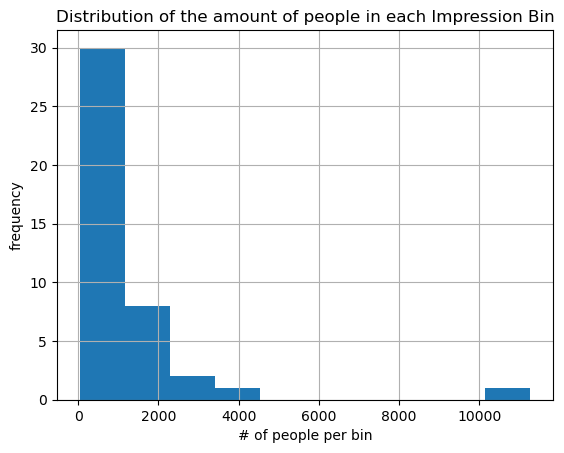

In [10]:
data['# People /Bin'].hist()
plt.xlabel('# of people per bin')
plt.ylabel('frequency')
plt.title('Distribution of the amount of people in each Impression Bin')

#### Using proportions / conversion rates will be a more meaningful approach

/Users/bethelhagos/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


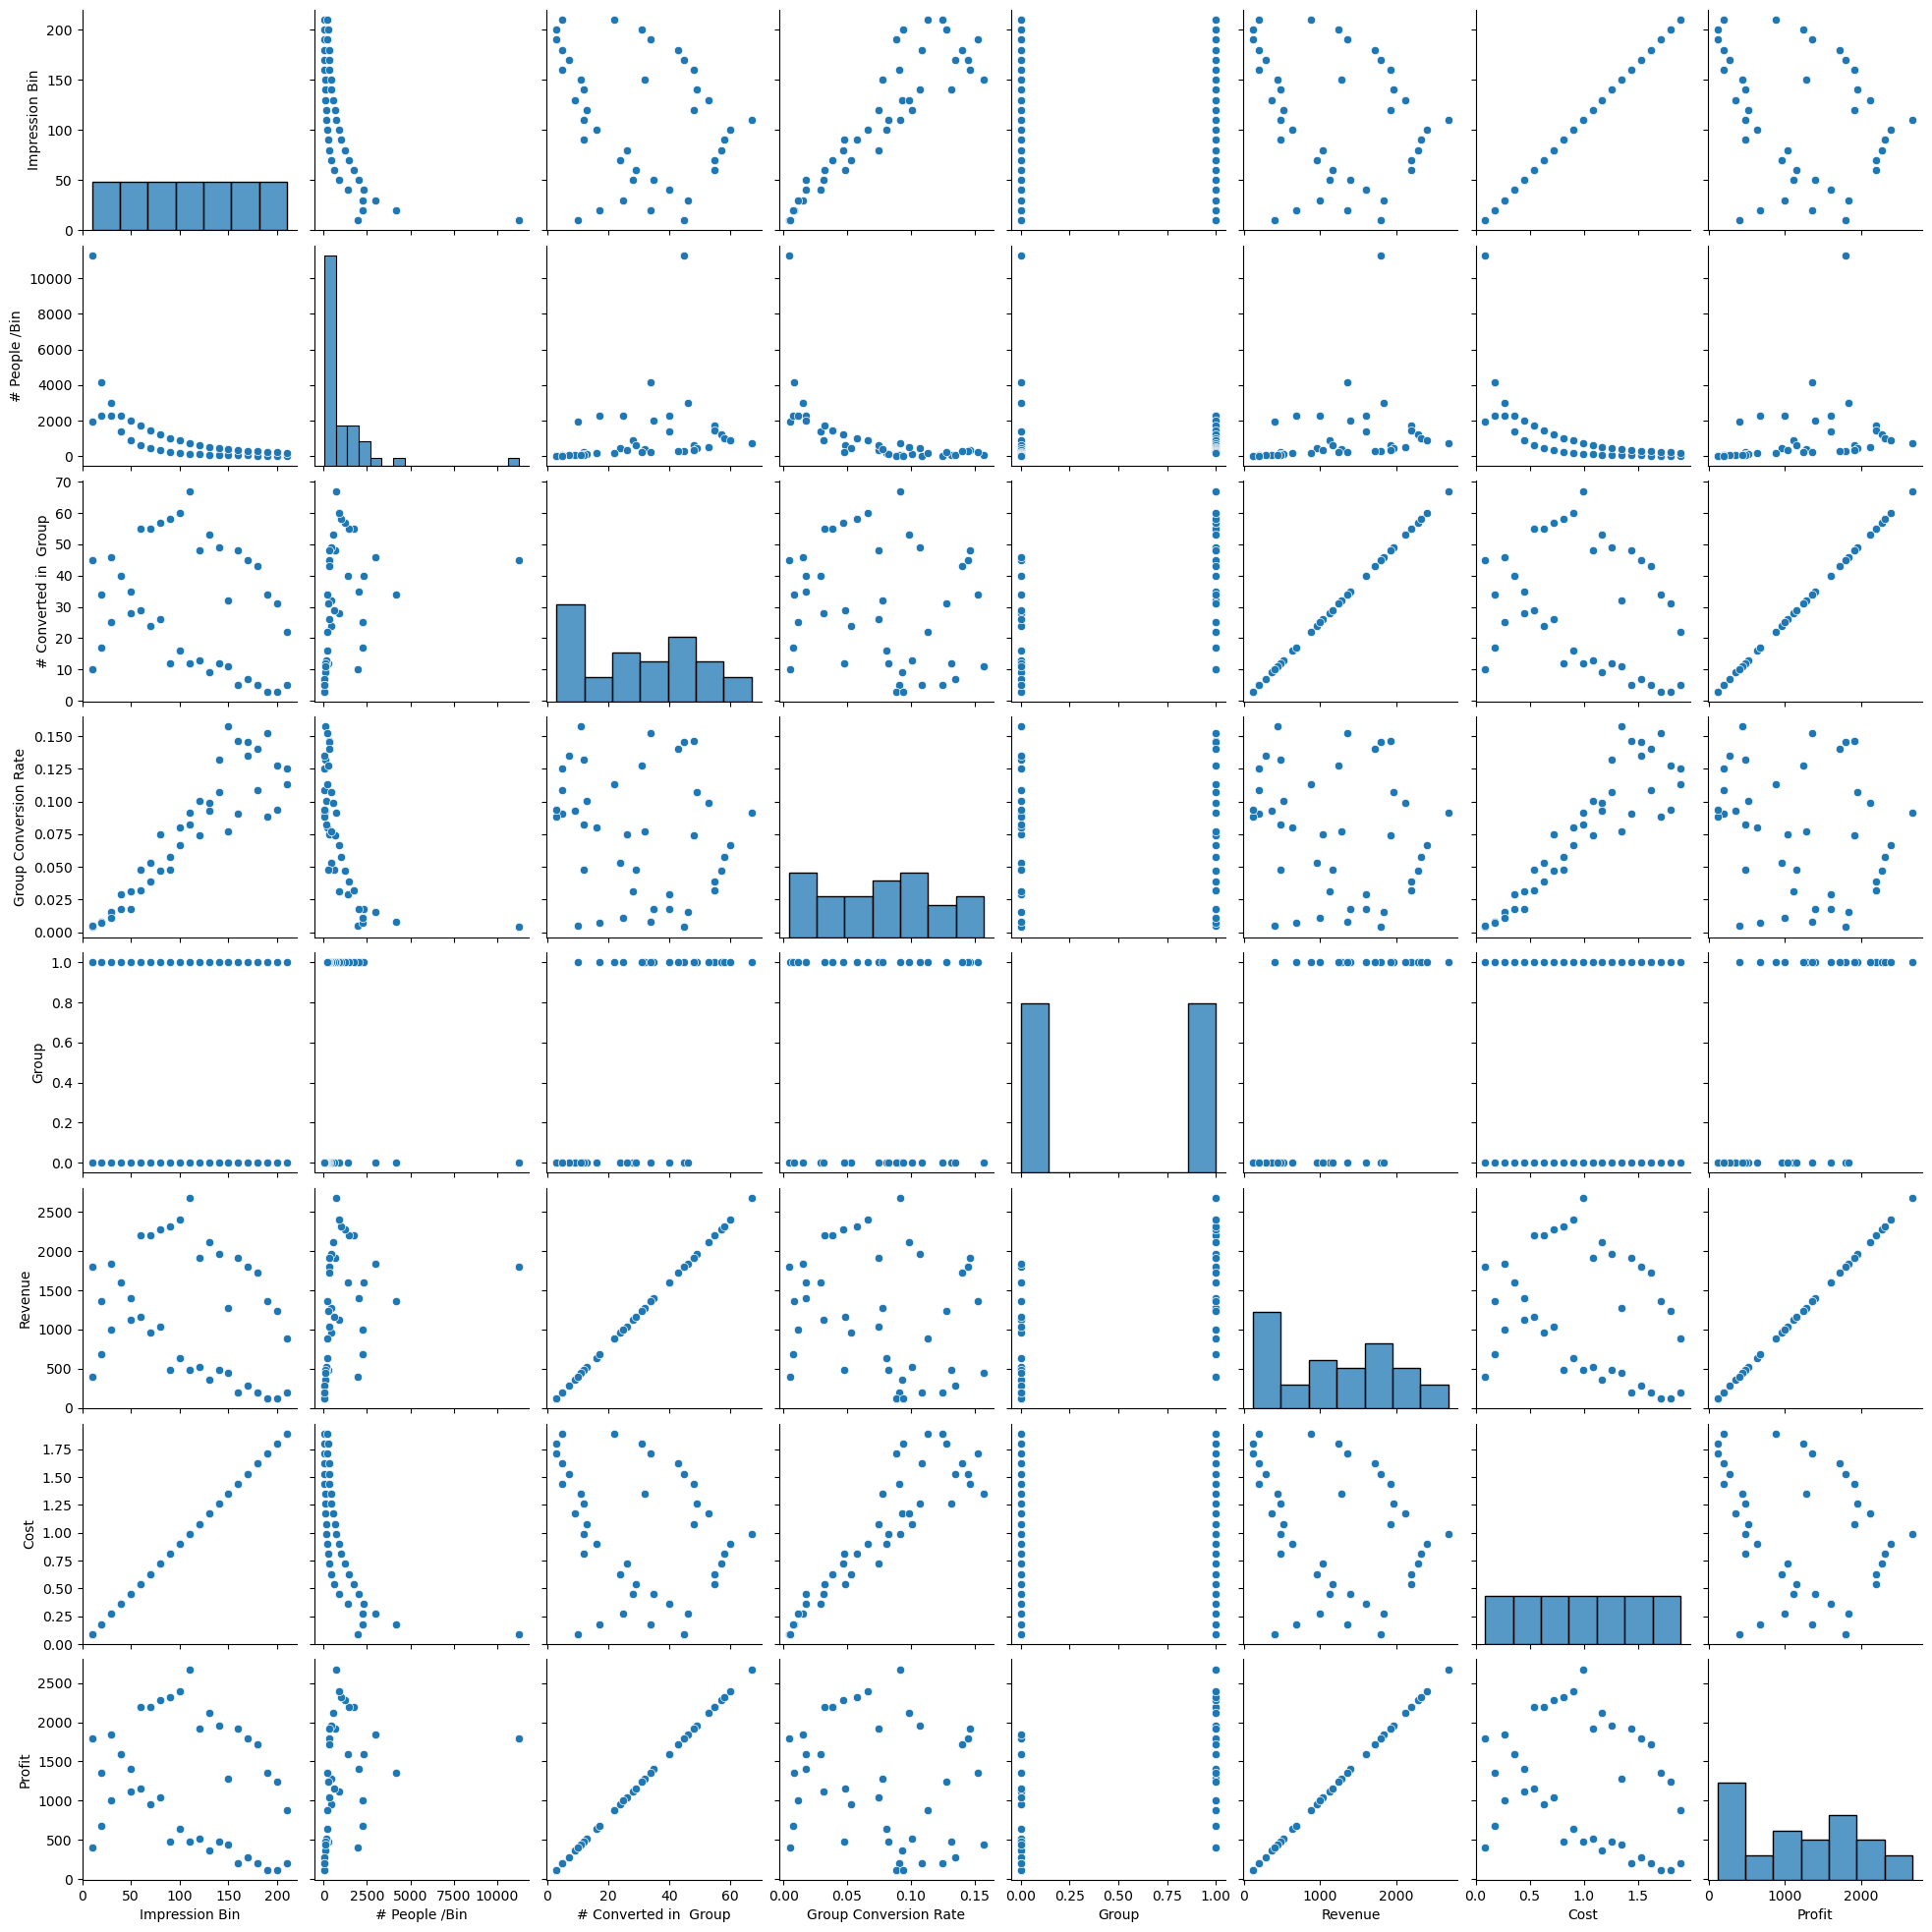

In [67]:
sns.pairplot(data)

## Analysis & Findings

### Question 1 - Was the advertising campaign effective? 

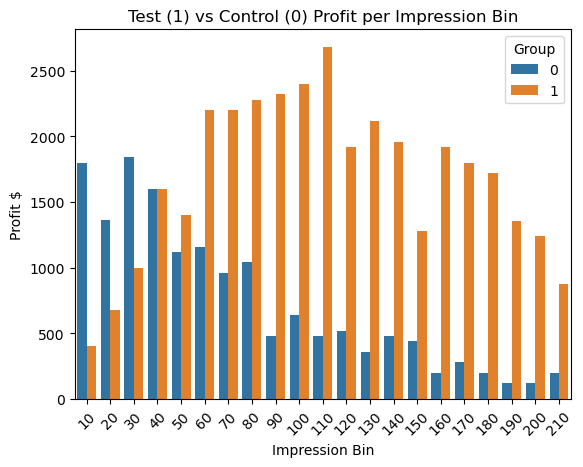

In [11]:
sns.barplot(x='Impression Bin', y='Profit', hue='Group', data=data)
plt.title("Test (1) vs Control (0) Profit per Impression Bin")
plt.xlabel("Impression Bin")
plt.ylabel("Profit $")
plt.xticks(rotation=45)
plt.show()

In [12]:
# compare averages
control_avg_conversion_rate = data[data['Group']==0].mean()
test_avg_conversion_rate = data[data['Group']==1].mean()
print('Aggregated Conversion Rate for Control', control_avg_conversion_rate)
print('Aggregated Conversion Rate for Test', test_avg_conversion_rate)

Aggregated Conversion Rate for Control Impression Bin            110.000000
# People /Bin            1109.809524
Converted in Group         18.333333
Group Conversion Rate       0.076112
Group                       0.000000
Revenue                   733.333333
Cost                        0.990000
Profit                    732.343333
dtype: float64
Aggregated Conversion Rate for Test Impression Bin            110.000000
# People /Bin            1020.523810
Converted in Group         42.095238
Group Conversion Rate       0.074915
Group                       1.000000
Revenue                  1683.809524
Cost                        0.990000
Profit                   1682.819524
dtype: float64


### We see similar numbers of people per bin in both control and test groups, but there appears to be a difference in the number of people converted in each group, the revenue, and the proft. Is the difference in group conversion rate statistically significant? Let's run a couple of  independent samples t-tests on the conversion rate means & profit means.

## First, evaluate effectiveness in terms of profit from the campaign
### Null Hypothesis : There is not a significant difference in profit between the test and control groups.
### Alternative Hypothesis : There is a significant difference in profit between the test and control groups, where test profit > control profit.

In [14]:
# Run an independent samples t test - note that the Assumption of Normality has been violated by the Control group

# separate T & C groups
test_group = data[data['Group']==1]
control_group = data[data['Group']==0]

# get profits
profit_T = test_group['Profit']
profit_C = control_group['Profit']

# run test & print results
t_stat, p_value = stats.ttest_ind(profit_T, profit_C, alternative='greater')
u_statistic, p_value = stats.mannwhitneyu(profit_T, profit_C)


print('t stat:', t_stat)
print('Mann-Whitney U-test:', u_statistic)
print('p_value:', p_value)


t stat: 5.245464092375957
Mann-Whitney U-test: 382.5
p_value: 4.848411206161541e-05


### There is sufficient evidence at the 0.05 significance level to reject the null hypothesis, meaning there is a statistically significant difference between the means, wherein the treatment group generated higher profits. The campaign made a stat sig difference in profit. Thus, the marketing campaign was effective.

## Second, evaluate effectiveness in terms of aggregate level conversion rates during the campaign

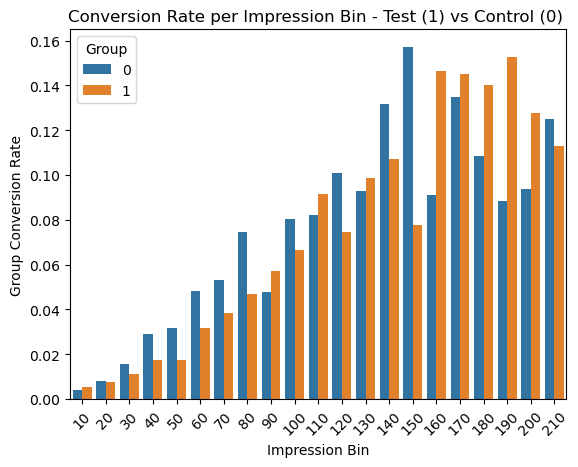

In [15]:
sns.barplot(x='Impression Bin', y='Group Conversion Rate', hue='Group', data=data)
plt.title("Conversion Rate per Impression Bin - Test (1) vs Control (0) ")
plt.xlabel("Impression Bin")
plt.ylabel("Group Conversion Rate")
plt.xticks(rotation=45)
plt.show()

In [16]:
# Run an independent samples t test - note that the Assumption of Normality has been violated by the Control group

# separate T & C groups
test_group = data[data['Group']==1]
control_group = data[data['Group']==0]

# get aggregate level conversion rates
c_rate_T = test_group['Group Conversion Rate']
c_rate_C = control_group['Group Conversion Rate']

# run test & print results
t_stat, p_value = stats.ttest_ind(c_rate_T, c_rate_C, alternative='greater')
u_statistic, p_value = stats.mannwhitneyu(c_rate_T, c_rate_C)


print('t stat:', t_stat)
print('Mann-Whitney U-test:', u_statistic)
print('p_value:', p_value)


t stat: -0.08232492032060178
Mann-Whitney U-test: 217.0
p_value: 0.9398429773571263


### Based on the aggregate level conversion rates, there is not sufficient evidence at the 0.05 significance level to reject the null hypothesis, meaning there is not a statistically significant difference between the test and control means. I believe this is an example of Simpson's Paradox.

### Clearly, in the visual above, certain Impression bins performed better than others. So let's do an ANOVA on the impression bins and run post hoc analysis using the Tukey test to find out which ones were different from each other.

### Visualize # of people/bin across Impression Bins

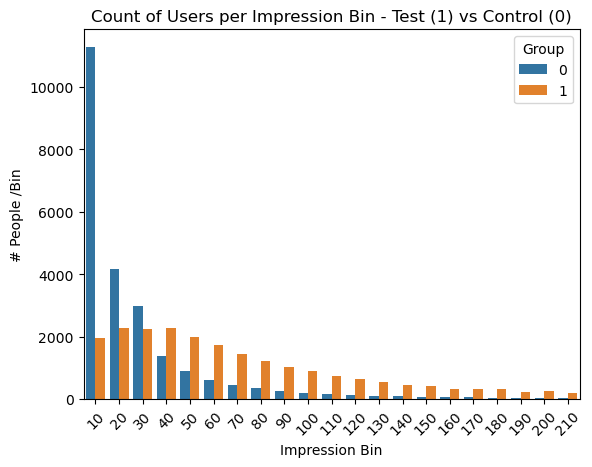

In [17]:
sns.barplot(x='Impression Bin', y='# People /Bin', hue='Group', data=data)
plt.title("Count of Users per Impression Bin - Test (1) vs Control (0)")
plt.xlabel("Impression Bin")
plt.ylabel("# People /Bin")
plt.xticks(rotation=45)
plt.show()

### In addition to the assumption of normality violation, the conversion rates are artificially higher for higher impression bins due to the high number of people in the lower bins. Perhaps applying a log transformation could help here.

In [18]:
# Add a constant if needed:
data['# People /Bin'] = data['# People /Bin'] + 1  

# Apply the log transformation:
data['log_people_per_bin'] = np.log10(data['# People /Bin']) 

# Calculate conversion proportions (using the log-transformed column if desired): 
data['Conversion Proportion'] = data['Group Conversion Rate'] / data['log_people_per_bin']  # Or use the original column

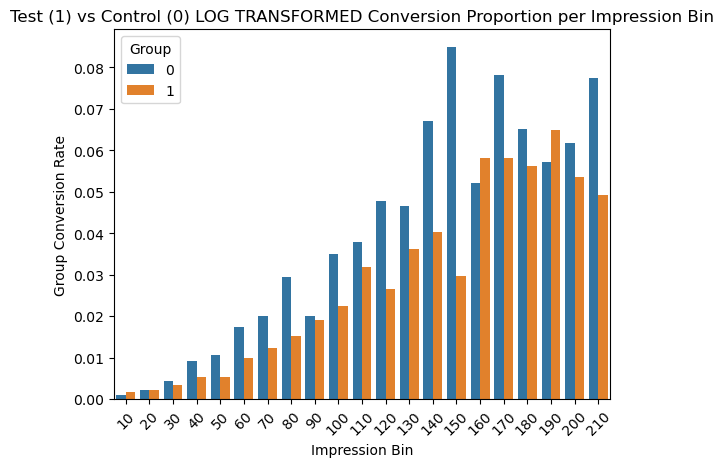

In [19]:
sns.barplot(x='Impression Bin', y='Conversion Proportion', hue='Group', data=data)
plt.title("Test (1) vs Control (0) LOG TRANSFORMED Conversion Proportion per Impression Bin")
plt.xlabel("Impression Bin")
plt.ylabel("Group Conversion Rate")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Run an independent samples t test - note that the Assumption of Normality has been violated by the Control group

# separate T & C groups
test_group = data[data['Group']==1]
control_group = data[data['Group']==0]

# get aggregate level conversion rates
prop_T = test_group['Conversion Proportion']
prop_C = control_group['Conversion Proportion']

# run test & print results
t_stat, p_value = stats.ttest_ind(prop_T, prop_C, alternative='greater')
u_statistic, p_value = stats.mannwhitneyu(prop_T, prop_C)


print('t stat:', t_stat)
print('Mann-Whitney U-test:', u_statistic)
print('p_value:', p_value)

t stat: -1.4142747109632523
Mann-Whitney U-test: 172.0
p_value: 0.22724906376880494


## Not statistically significant. However maybe there is a different story at the user level

### Visualize converted in group across Impression Bins

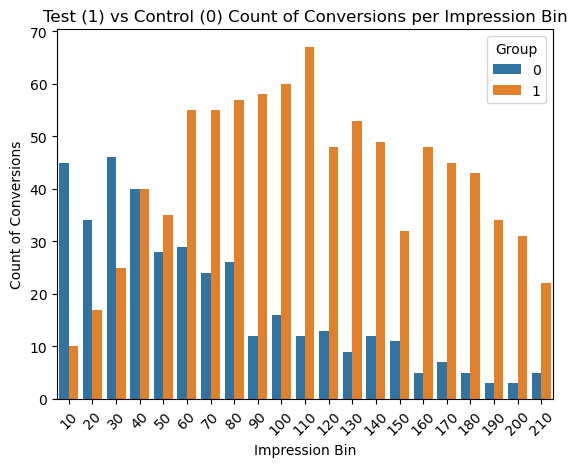

In [22]:
sns.barplot(x='Impression Bin', y='Converted in Group', hue='Group', data=data)
plt.title("Test (1) vs Control (0) Count of Conversions per Impression Bin")
plt.xlabel("Impression Bin")
plt.ylabel("Count of Conversions")
plt.xticks(rotation=45)
plt.show()

Of course, this is directly proportional to the revenue / profit calculation

# Try looking at different proportions of de-aggregated, user level data

In [23]:
user_level = pd.read_csv('rocket_fuel_user_level.csv')
user_level.head()

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
0,1069124,1,0,130,1,20
1,1119715,1,0,93,2,22
2,1144181,1,0,21,2,18
3,1435133,1,0,355,2,10
4,1015700,1,0,276,5,14


In [24]:
# What were the relative conversion rates and group sizes?
T_user_data = user_level[user_level['test']==1]
C_user_data = user_level[user_level['test']==0]

T_conversion_rate = T_user_data['converted'].sum() / T_user_data.shape[0]
C_conversion_rate = C_user_data['converted'].sum() / C_user_data.shape[0]

print('test group conversion rate:', T_conversion_rate)
print('control group conversion rate:', C_conversion_rate)
print('test group size:', T_user_data.shape[0])
print('control group size:', C_user_data.shape[0])

test group conversion rate: 0.025546559636683747
control group conversion rate: 0.01785410644448223
test group size: 564577
control group size: 23524


In [25]:
# What was the change in conversion rate due to the experiment?
true_c_rate = T_conversion_rate-C_conversion_rate
print(true_c_rate)

0.007692453192201517


# Summarize the results & financial metrics visually

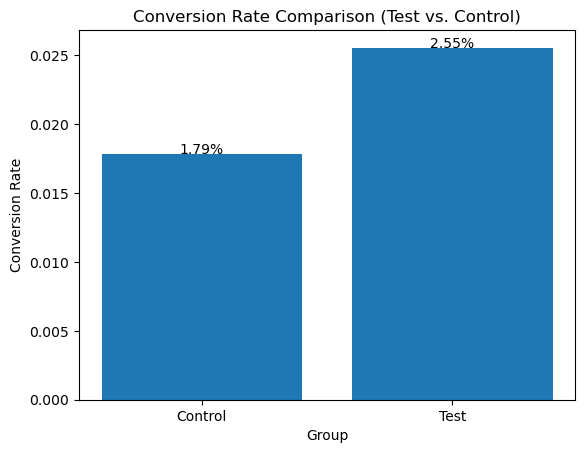

In [26]:
# Visualize conversion rates side by side
groups = ['Control', 'Test']
conversion_rates = [C_conversion_rate, T_conversion_rate]


plt.bar(groups, conversion_rates)
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Comparison (Test vs. Control)')

# Add percentage labels above bars (optional)
for i, rate in enumerate(conversion_rates):
    plt.text(i, rate, f"{rate:.2%}", ha='center')

plt.show()

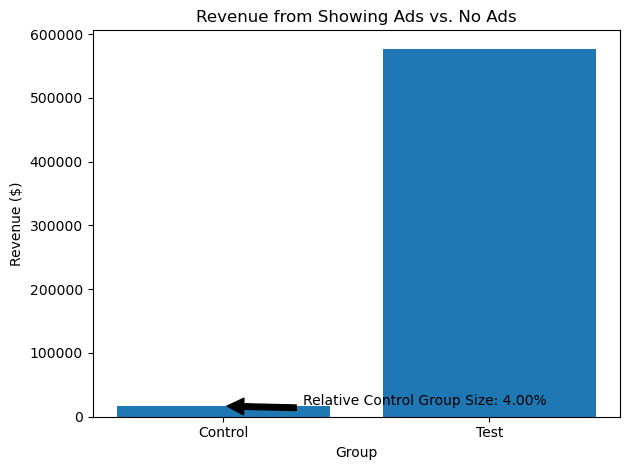

In [27]:
# Visualize revenues side by side
groups = ['Control', 'Test']
revenue = [16800, 576920]
control_group_size_relative = 0.039999931984472055

# Create the bar chart
plt.bar(groups, revenue)

# Labels and formatting
plt.xlabel('Group')
plt.ylabel('Revenue ($)')
plt.title('Revenue from Showing Ads vs. No Ads')

# Add annotations for important metrics
plt.annotate(f'Relative Control Group Size: {control_group_size_relative:.2%}', 
             xy=(0, revenue[0]),  # 'xy' now targets the Control bar
             xytext=(0.3, revenue[0] * 1.1),  # Offset to the left
             arrowprops=dict(facecolor='black', shrink=0.05))

# Adjust spacing for better readability 
plt.tight_layout()

# Display the chart
plt.show()

# This is the conversion rate above baseline. 0.769%

In [28]:
#What were the revenue totals from showing ads, not show ads, and what was the change from running the campaign?
test_group_size = T_user_data.shape[0]
control_group_size = C_user_data.shape[0]
CvsT_C = control_group_size/ (control_group_size+ test_group_size)

# Calculate rev
T_rev = T_conversion_rate * test_group_size*40 

# Calculate rev
C_rev = C_conversion_rate * control_group_size*40

print('relative control group size:', CvsT_C)
print('revenue from showing ads:','$', T_rev)
print('revenue even without showing ads:', '$', C_rev)

# or 
est_rev = true_c_rate *(test_group_size)*40
print('estimated rev increase above baseline:', '$', est_rev)

relative control group size: 0.039999931984472055
revenue from showing ads: $ 576920.0
revenue even without showing ads: $ 16800.0
estimated rev increase above baseline: $ 173719.28583574222


In [29]:
# What was the total revenue from the campaign/experiment?
print('money made from the campaign/experiment:', '$', T_rev + C_rev)

money made from the campaign/experiment: $ 593720.0


In [30]:
# Opportunity cost of having a control group
missed_opp = control_group_size*true_c_rate*40
print('Opportunity Cost of using a Control Group:', '$', f'{missed_opp:.2f}')

Opportunity Cost of using a Control Group: $ 7238.29


In [31]:
# What was the net profit & ROI?
total_rev = est_rev
total_cost = (9/1000)* (user_level['tot_impr'].sum())


profit = total_rev - total_cost
ROI = (profit/total_cost)*100


print('Campaign Profit:','$', profit)
print('Campaign Cost:', '$', total_cost)
print('Campaign ROI:', ROI, '%')

Campaign Profit: $ 42344.647835742246
Campaign Cost: $ 131374.63799999998
Campaign ROI: 32.23198060172181 %


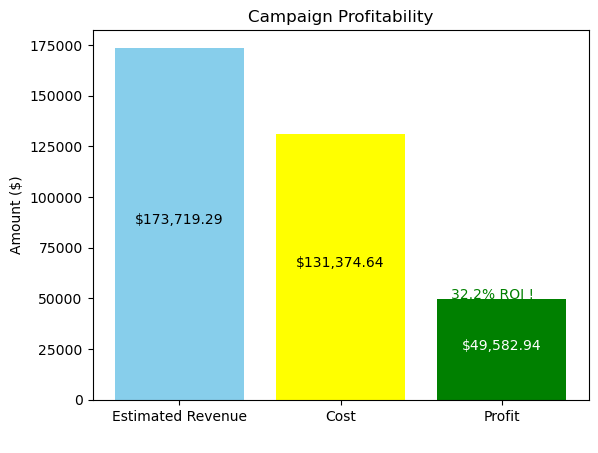

In [32]:
# Data
labels = ['Estimated Revenue', 'Cost']
values = [173719.29, 131374.64] 
profit = 49582.94 
roi = 32.2

# Colorblind-friendly colors
colors = ['skyblue', 'yellow']  

# Stacked bars for cost and revenue
plt.bar(labels, values, color=colors)

# Separate bar for profit
plt.bar('Profit', profit, color='green')

# Labels and formatting
plt.xlabel(' ')
plt.ylabel('Amount ($)')
plt.title('Campaign Profitability')

# Add annotations
for i, value in enumerate(values):
    plt.text(i, value/2, f"${value:,.2f}", ha='center')

plt.text(2, profit/2, f"${profit:,.2f}", ha='center', color='white')
plt.annotate(f"32.2% ROI !", xy=(2.2, profit), color='green', ha='right')

plt.show()

# Are there time of the day effects?

Text(0, 0.5, 'Count of Conversions')

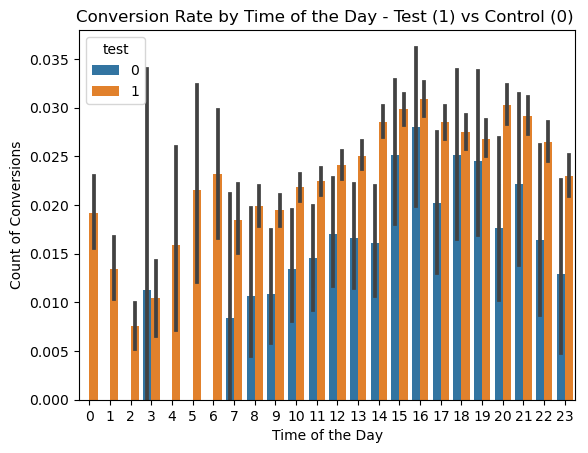

In [211]:
sns.barplot(x='mode_impr_hour', y='converted', hue='test', data=user_level)
plt.title("Conversion Rate by Time of the Day - Test (1) vs Control (0) ")
plt.xlabel("Time of the Day")
plt.ylabel("Count of Conversions")